Problem Statement: Loan Approval Prediction Problem

Type: Binary Classification Loan approval prediction is classic problem to learn and apply lots of data analysis techniques to create best Classification model.

Given with the dataset consisting of details of applicants for loan and status whether the loan application is approved or not. Basis on the a binary classification model is to be created with maximum accuracy.

In [ ]:
### Step 1
### Import the packages numpy, pandas, matplotlib, seaborn, sklearn, train test split,metrics

In [ ]:
### Step 2:Load the Dataset

In [ ]:
### Step 3:Explore the data-shape, visualisation

In [1]:
### Step 4:X,y -- >train data test data->Fit the model with training data predict with the test data

In [2]:
#basic and most important libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

#Classifiers
from sklearn.ensemble import AdaBoostClassifier , GradientBoostingClassifier, RandomForestClassifier
from sklearn. linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier

#Model evaluation tools
from sklearn.metrics import classification_report , accuracy_score , confusion_matrix
from sklearn.metrics import f1_score
from sklearn.model_selection import cross_val_score

#Data processing functions
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
import warnings
warnings.filterwarnings("ignore")


In [3]:
df=pd.read_csv("loan_prediction.csv")

In [5]:
df.sample(25)

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
358,LP002158,Male,Yes,0,Not Graduate,No,3000,1666.0,100.0,480.0,0.0,Urban,N
532,LP002723,Male,No,2,Graduate,No,3588,0.0,110.0,360.0,0.0,Rural,N
587,LP002917,Female,No,0,Not Graduate,No,2165,0.0,70.0,360.0,1.0,Semiurban,Y
34,LP001100,Male,No,3+,Graduate,No,12500,3000.0,320.0,360.0,1.0,Rural,N
168,LP001579,Male,No,0,Graduate,No,2237,0.0,63.0,480.0,0.0,Semiurban,N
256,LP001849,Male,No,0,Not Graduate,No,6045,0.0,115.0,360.0,0.0,Rural,N
239,LP001792,Male,Yes,1,Graduate,No,3315,0.0,96.0,360.0,1.0,Semiurban,Y
249,LP001825,Male,Yes,0,Graduate,No,1809,1868.0,90.0,360.0,1.0,Urban,Y
359,LP002160,Male,Yes,3+,Graduate,No,5167,3167.0,200.0,360.0,1.0,Semiurban,Y
254,LP001844,Male,No,0,Graduate,Yes,16250,0.0,192.0,360.0,0.0,Urban,N


In [8]:
df.shape

(614, 13)

In [6]:
df.dtypes

Loan_ID               object
Gender                object
Married               object
Dependents            object
Education             object
Self_Employed         object
ApplicantIncome        int64
CoapplicantIncome    float64
LoanAmount           float64
Loan_Amount_Term     float64
Credit_History       float64
Property_Area         object
Loan_Status           object
dtype: object

<AxesSubplot:xlabel='Gender', ylabel='count'>

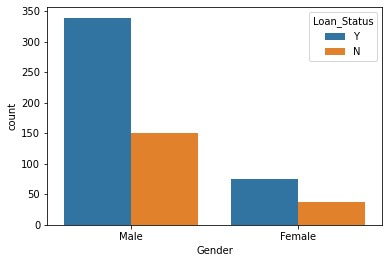

In [9]:
sns.countplot(x="Gender",hue="Loan_Status",data=df)

<AxesSubplot:xlabel='Married', ylabel='count'>

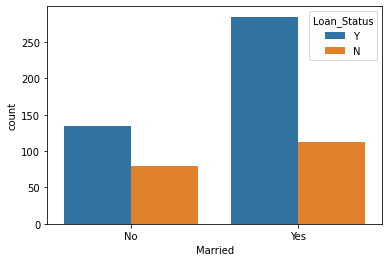

In [10]:
sns.countplot(x="Married",hue="Loan_Status",data=df)

In [11]:
correlation_mat=df.corr()

<AxesSubplot:>

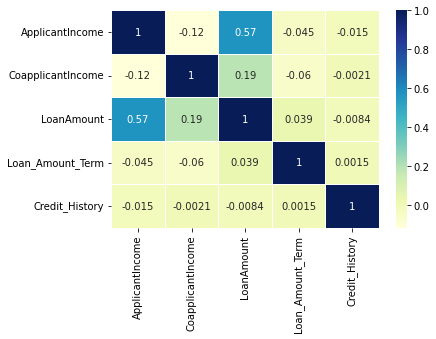

In [12]:
sns.heatmap(correlation_mat,annot=True,linewidths=0.5,cmap="YlGnBu")

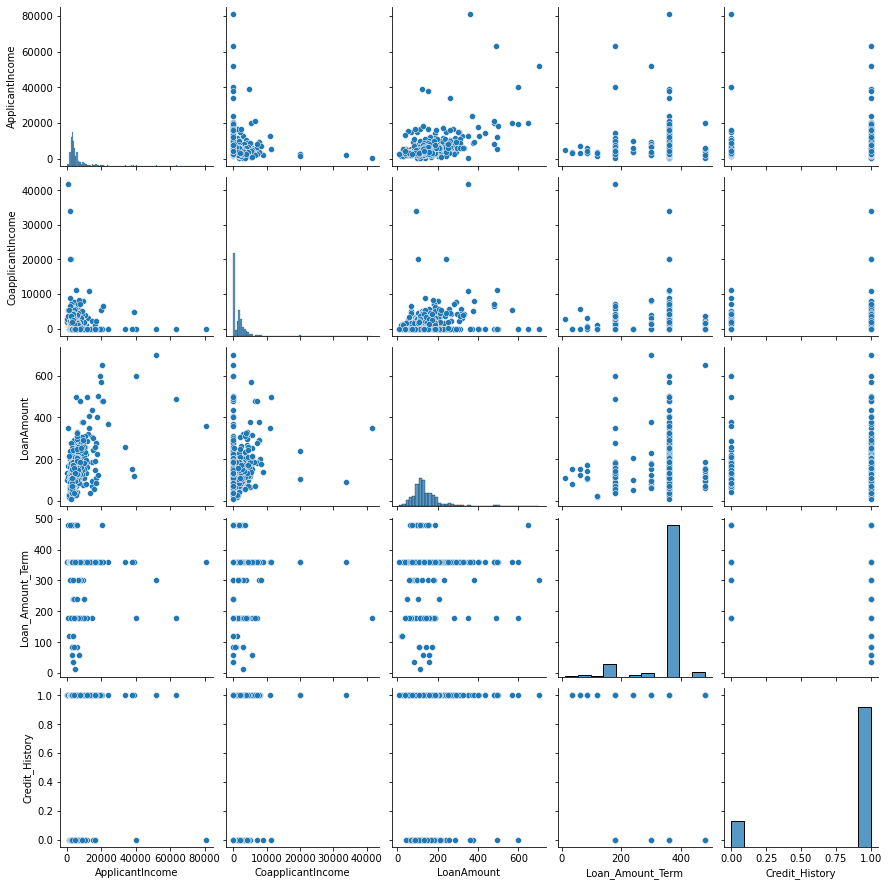

In [13]:
sns.pairplot(df)
plt.show()

In [ ]:
## positive relation btw applicant income and loan amount , coapplicant income and loanamount

In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


In [15]:
df.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,592.000000,600.00000,564.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2877.500000,0.000000,100.000000,360.00000,1.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000


In [16]:
df.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [ ]:
## handling missing data

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64


<AxesSubplot:>

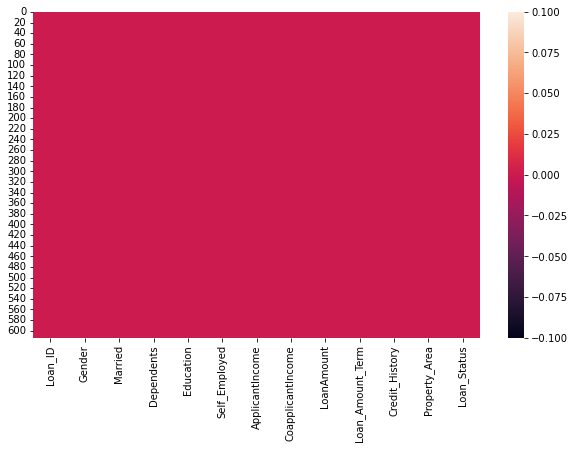

In [17]:
#Filling all Nan values with mode of respective variable
df["Gender"].fillna(df["Gender"].mode()[0], inplace=True)
df["Married"].fillna(df["Married"].mode() [0], inplace=True)
df["Self_Employed"].fillna(df["Self_Employed"].mode()[0], inplace=True)
df["Loan_Amount_Term"].fillna(df["Loan_Amount_Term"].mode()[0], inplace=True)
df["Dependents"]. fillna(df["Dependents"].mode()[0], inplace=True)
df["Credit_History"].fillna(df["Credit_History"].mode()[0], inplace=True)

#All values of "Dependents" columns were of "str" form now converting to "int" form.
df["Dependents"] = df["Dependents"]. replace('3+', int(3))
df["Dependents"] = df["Dependents"].replace('1', int(1))
df["Dependents"] = df["Dependents"]. replace('2', int(2))
df["Dependents"] = df["Dependents"].replace('0', int(0))

df["LoanAmount"].fillna(df["LoanAmount"].median(), inplace=True)

print(df.isnull().sum())

#Heat map for null values
plt.figure(figsize=(10,6))
sns.heatmap(df.isnull())

In [18]:
df.dtypes

Loan_ID               object
Gender                object
Married               object
Dependents             int64
Education             object
Self_Employed         object
ApplicantIncome        int64
CoapplicantIncome    float64
LoanAmount           float64
Loan_Amount_Term     float64
Credit_History       float64
Property_Area         object
Loan_Status           object
dtype: object

In [19]:
df["Gender"] = le. fit_transform(df["Gender"])
df["Married"] = le.fit_transform(df["Married"])
df["Education"] = le.fit_transform(df["Education"])
df["Self_Employed"] = le.fit_transform(df["Self_Employed"])
df["Property_Area"] = le.fit_transform(df["Property_Area"])
df["Loan_Status"] = le.fit_transform(df["Loan_Status"])

#data = pd.get_dummies(data)
df.head(5)

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,1,0,0,0,0,5849,0.0,128.0,360.0,1.0,2,1
1,LP001003,1,1,1,0,0,4583,1508.0,128.0,360.0,1.0,0,0
2,LP001005,1,1,0,0,1,3000,0.0,66.0,360.0,1.0,2,1
3,LP001006,1,1,0,1,0,2583,2358.0,120.0,360.0,1.0,2,1
4,LP001008,1,0,0,0,0,6000,0.0,141.0,360.0,1.0,2,1


In [20]:
df.dtypes

Loan_ID               object
Gender                 int32
Married                int32
Dependents             int64
Education              int32
Self_Employed          int32
ApplicantIncome        int64
CoapplicantIncome    float64
LoanAmount           float64
Loan_Amount_Term     float64
Credit_History       float64
Property_Area          int32
Loan_Status            int32
dtype: object

In [21]:
df.drop("Loan_ID",axis=1,inplace=True)

In [22]:
df.head(2)

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,1,0,0,0,0,5849,0.0,128.0,360.0,1.0,2,1
1,1,1,1,0,0,4583,1508.0,128.0,360.0,1.0,0,0


In [23]:
X= df.drop(["Loan_Status"],axis=1)
y=df["Loan_Status"]

In [24]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=0)

In [ ]:
#LOGISTIC REGRESSION

In [25]:
model=LogisticRegression(solver="liblinear")

In [26]:
model.fit(X_train,y_train)

LogisticRegression(solver='liblinear')

In [27]:
model.score(X_train,y_train)

0.8018648018648019

In [28]:
model.score(X_test,y_test)

0.8324324324324325

In [ ]:
# DECISION TREE

In [30]:
dt=DecisionTreeClassifier(criterion='gini')
dt.fit(X_train,y_train)

DecisionTreeClassifier()

In [31]:
dt.score(X_train,y_train)

1.0

In [32]:
dt.score(X_test,y_test)

0.7405405405405405

In [33]:
# its overfitting as we can see

In [70]:
dtree=DecisionTreeClassifier(criterion='gini',max_depth=6,random_state=0)
dtree.fit(X_train,y_train)

DecisionTreeClassifier(max_depth=6, random_state=0)

In [71]:
dtree.score(X_train,y_train)

0.8484848484848485

In [72]:
dtree.score(X_test,y_test)

0.8108108108108109

In [73]:
from sklearn.ensemble import BaggingClassifier

In [77]:
model_bgc=BaggingClassifier(n_estimators=98,base_estimator=dtree)  #control overfitting

In [78]:
model_bgc.fit(X_train,y_train)

BaggingClassifier(base_estimator=DecisionTreeClassifier(max_depth=6,
                                                        random_state=0),
                  n_estimators=98)

In [79]:
print(model_bgc.score(X_train,y_train))
print(model_bgc.score(X_test,y_test))

0.8554778554778555
0.8162162162162162


In [84]:
from sklearn.ensemble import AdaBoostClassifier
model_adbc=AdaBoostClassifier(n_estimators=8,random_state=0)  #control overfitting
model_adbc.fit(X_train,y_train)

AdaBoostClassifier(n_estimators=8, random_state=0)

In [85]:
print(model_adbc.score(X_train,y_train))
print(model_adbc.score(X_test,y_test))

0.8018648018648019
0.8162162162162162


In [86]:
from sklearn.ensemble import GradientBoostingClassifier

In [99]:
model_gbc=GradientBoostingClassifier(n_estimators=10,random_state=0)  #control overfitting

In [100]:
model_gbc.fit(X_train,y_train)

GradientBoostingClassifier(n_estimators=10, random_state=0)

In [101]:
print(model_gbc.score(X_train,y_train))
print(model_gbc.score(X_test,y_test))

0.8158508158508159
0.827027027027027


In [104]:
from sklearn.ensemble import RandomForestClassifier

In [255]:
rfc=RandomForestClassifier(n_estimators=4,random_state=0,max_depth=3,max_features=5)

In [256]:
rfc.fit(X_train,y_train)

RandomForestClassifier(max_depth=3, max_features=5, n_estimators=4,
                       random_state=0)

In [257]:
print(rfc.score(X_train,y_train))
print(rfc.score(X_test,y_test))

0.8111888111888111
0.827027027027027
